In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
class ForwardContract:
        def __init__(self, price, maturity, rsk_fr_rate):
            self.price = price
            self.maturity = maturity
            self.rsk_fr_rate = rsk_fr_rate

        def no_income_price(self):
            return self.price*np.exp(self.maturity * self.rsk_fr_rate)

        def cash_income_price(self, incom):
            return (self.price - incom)*np.exp(self.maturity * self.rsk_fr_rate)

        def yield_income_price(self, incom_rate):
            return self.price*np.exp(self.maturity * (self.rsk_fr_rate - incom_rate))

In [3]:
times_to_maturity = np.arange(0, 1.5 + 1/12, 1/12)

In [9]:
S0 = 40
r = 0.4
fw = ForwardContract(S0, times_to_maturity, r)

In [10]:
prices_without_income = fw.no_income_price()

In [19]:
inc = 5
cash_inc_prices = fw.cash_income_price(inc)

In [21]:
inc_rate = 0.1
yield_inc_prices = fw.yield_income_price(inc_rate)

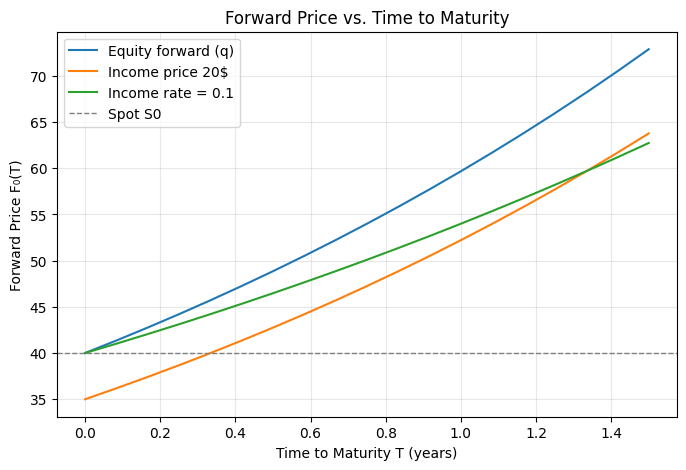

In [22]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(times_to_maturity, prices_without_income, label="Equity forward (q)")
plt.plot(times_to_maturity, cash_inc_prices, label="Income price 20$")
plt.plot(times_to_maturity, yield_inc_prices, label="Income rate = 0.1")

# plt.plot(T, F_fx,     label="FX forward (r_d - r_f)")
# plt.plot(T, F_cmdty,  label="Commodity forward (r + u - y)")

# Spot price reference
plt.axhline(S0, linestyle="--", color="gray", linewidth=1, label="Spot S0")

# Labels, legend, grid
plt.xlabel("Time to Maturity T (years)")
plt.ylabel("Forward Price F₀(T)")
plt.title("Forward Price vs. Time to Maturity")
plt.legend()
plt.grid(alpha=0.3)

plt.show()